In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('game_data.csv')

In [4]:
df.corr()

X         Y      velX      velY   target_Y
X          1.000000 -0.009631  0.000330  0.001099  -0.001829
 Y        -0.009631  1.000000  0.000731  0.000231   0.135399
 velX      0.000330  0.000731  1.000000  0.001159   0.018845
 velY      0.001099  0.000231  0.001159  1.000000   0.005823
 target_Y -0.001829  0.135399  0.018845  0.005823   1.000000

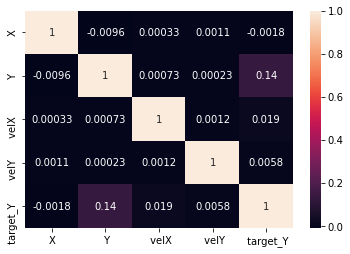

In [5]:
sns.heatmap(df.corr(), annot = True)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [7]:
X = df[[df.columns[0], df.columns[1], df.columns[2], df.columns[3]]]
y = df[df.columns[4]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [8]:
model = KNeighborsRegressor(n_neighbors = 3)

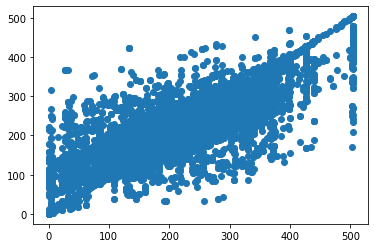

In [9]:
model.fit(X_train, y_train)

plt.scatter(y_test, model.predict(X_test))

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
model1 = KNeighborsRegressor(n_neighbors = 3)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model1.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

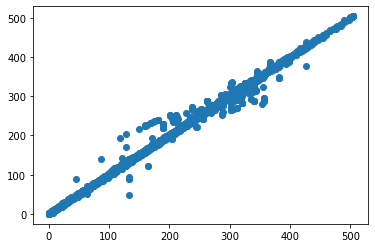

In [11]:
plt.scatter(y_test, model1.predict(X_test))

In [12]:
from sklearn.metrics import *

In [13]:
print(mean_squared_error(y_test, model.predict(X_test)))

13575.977682136836


In [14]:
model.predict(scaler.transform([[1180, 300, -1, -1]]))

array([160.])